In [52]:
import sklearn.metrics
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

import itertools

from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit, StratifiedKFold, KFold, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier



* We have loaded the necessary libraries above
* Now let's load the data

In [53]:
df_raw: pd.DataFrame = pd.read_csv("bank-additional-full.csv", delimiter=";")
df_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [54]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
y_counts = df_raw["y"].value_counts()

y_counts

no     36548
yes     4640
Name: y, dtype: int64

In [56]:
print(f'IMBALANCE: {min([y_counts["yes"],y_counts["no"]]) / (y_counts["yes"] + y_counts["no"])}')


IMBALANCE: 0.11265417111780131


finding rows with null values

In [57]:
nan_values: pd.DataFrame = df_raw[df_raw.isnull().any(axis=1)]

print(nan_values.shape)

nan_values


(0, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [58]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Info about the categorical values

In [59]:
cat_cols: tuple[str,...] = (
    "job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"
)


In [60]:
def printvc(colname: str, _df: pd.DataFrame):
    print(f"{colname.upper()}:")
    print(_df[colname].value_counts())



In [61]:
for c in cat_cols:
    printvc(c, df_raw)
    print("---\n")


JOB:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
---

MARITAL:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
---

EDUCATION:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
---

DEFAULT:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
---

HOUSING:
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
---

LOAN:
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
---

CONTACT:
cellular     261

time to convert the categories into one-hot and perform the other cleanup work needed

In [62]:
def get_values(colname: str, _df: pd.DataFrame):
    return _df[colname].unique()


cat_vals: dict[str, tuple[str, ...]] = dict(
    (c, tuple(v for v in get_values(c, df_raw))) for c in cat_cols
)

In [63]:
df_fixed: pd.DataFrame = df_raw.copy()

df_fixed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [64]:

del df_fixed["duration"]

In [65]:

df_fixed: pd.DataFrame = pd.get_dummies(df_fixed)

In [66]:
df_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [67]:
del df_fixed["y_no"]

df_fixed.rename(columns={"y_yes":"y"}, inplace=True)

Now let's do some checks of the numerical columns.

In [68]:
df_fixed.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.253035,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.434756,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
df_fixed.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


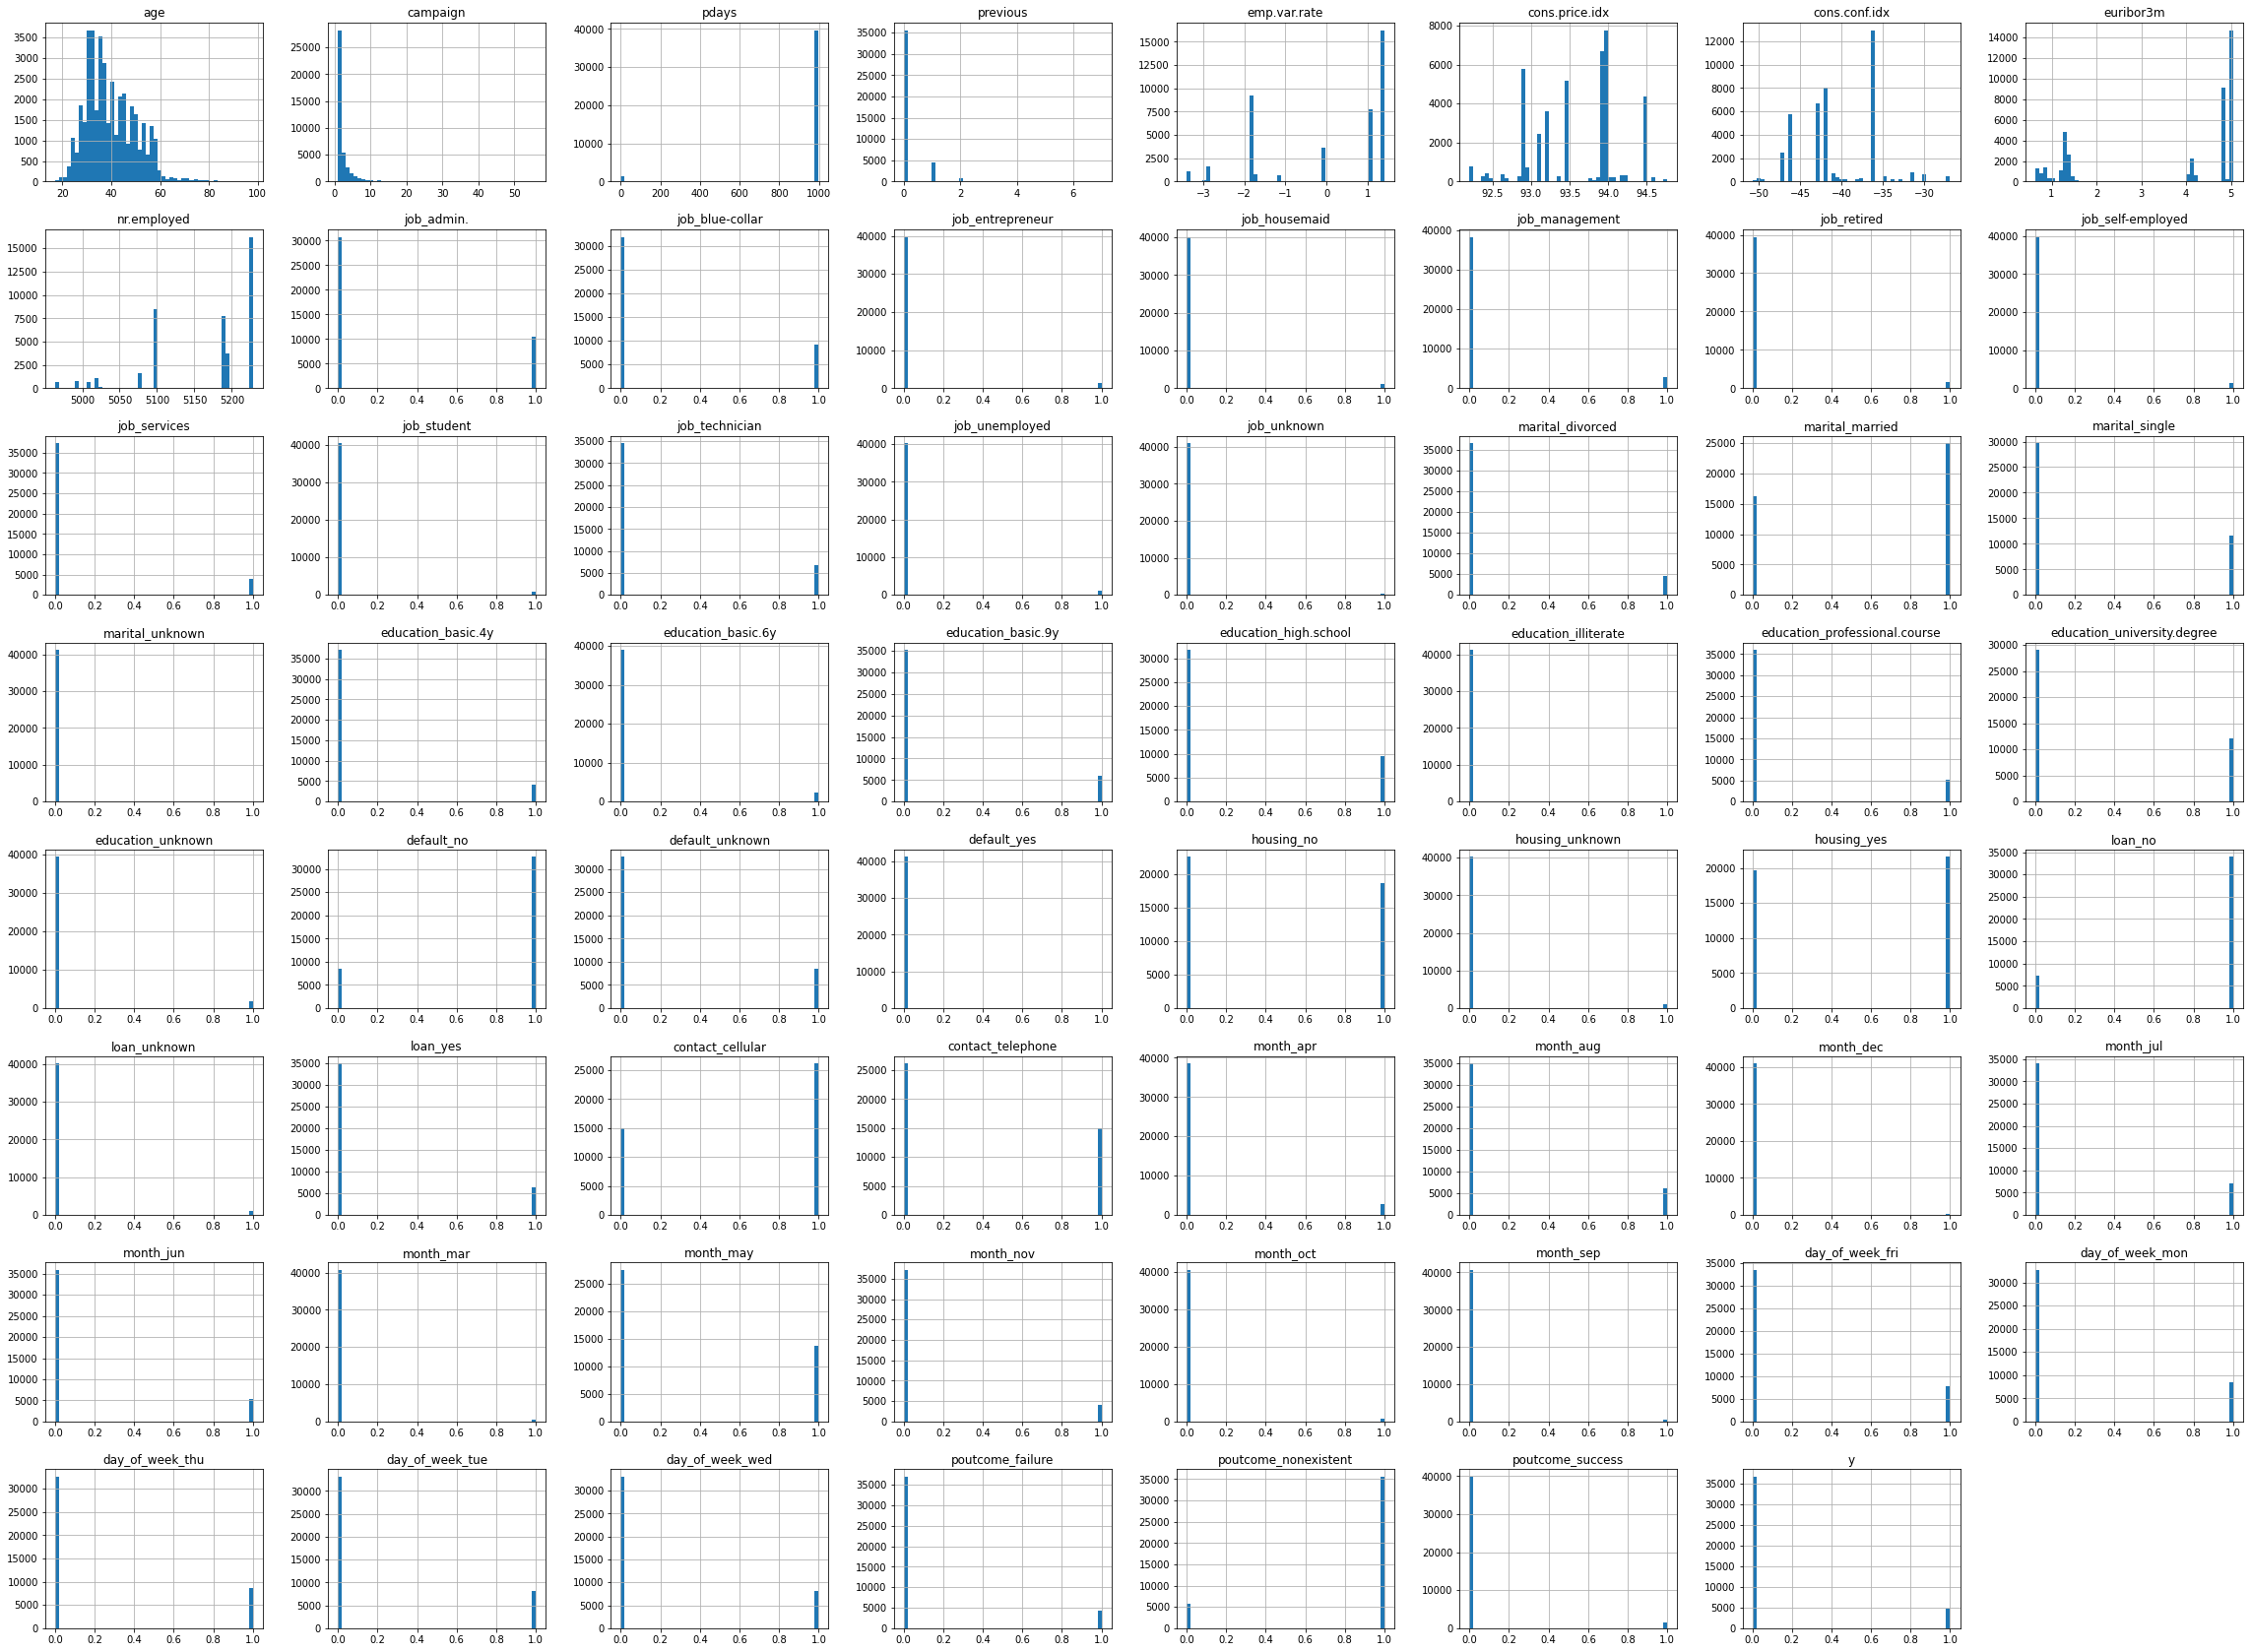

In [70]:
_ = df_fixed.hist(bins=50, figsize=(40,30))


TRAIN/TEST SPLITS

In [71]:
def train_test_splitter(in_df: pd.DataFrame, train_size: float = 0.8, rand_state: int = 50) -> tuple[
    pd.DataFrame, pd.DataFrame
]:
    return train_test_split(in_df, train_size=train_size, random_state=rand_state)

def x_y_splitter(the_df: pd.DataFrame, y_label: str = "y") -> tuple[pd.DataFrame, pd.DataFrame]:

    return the_df.loc[ : , the_df.columns != y_label], the_df[y_label]

def np_x_y_splitter(the_df: pd.DataFrame, y_label: str = "y") -> tuple[np.ndarray, np.ndarray]:

    x, y = x_y_splitter(the_df, y_label)
    return x.values, y.values

In [72]:

train, test = train_test_split(df_fixed, train_size=0.8, random_state=50)

In [73]:
x_train: pd.DataFrame = train.loc[ : , train.columns != "y"]

y_train: pd.DataFrame = train["y"]

x_train

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
33479,32,2,999,0,-1.8,92.893,-46.2,1.291,5099.1,0,...,0,0,0,0,0,1,0,0,1,0
36397,31,1,999,0,-2.9,92.963,-40.8,1.262,5076.2,0,...,0,0,0,0,0,1,0,0,1,0
10925,28,2,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
8877,41,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
32199,44,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32022,46,3,999,0,-1.8,92.893,-46.2,1.327,5099.1,0,...,0,0,0,0,1,0,0,0,1,0
41030,28,1,3,3,-1.1,94.601,-49.5,1.032,4963.6,1,...,1,0,0,1,0,0,0,0,0,1
22637,39,1,999,0,1.4,93.444,-36.1,4.964,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
38368,60,1,999,0,-3.4,92.431,-26.9,0.739,5017.5,0,...,1,0,0,1,0,0,0,0,1,0


In [74]:
x_test: pd.DataFrame = test.loc[ : , test.columns != "y"]

y_test: pd.DataFrame = test["y"]

x_test

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
6859,40,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
18440,42,6,999,0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
9521,35,1,999,0,1.4,94.465,-41.8,4.961,5228.1,0,...,0,0,0,1,0,0,0,0,1,0
15778,27,3,999,0,1.4,93.918,-42.7,4.960,5228.1,0,...,0,0,0,1,0,0,0,0,1,0
34235,32,2,999,0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11230,29,3,999,0,1.4,94.465,-41.8,4.961,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
21407,45,1,999,0,1.4,93.444,-36.1,4.963,5228.1,1,...,0,0,0,0,0,1,0,0,1,0
25439,31,3,999,0,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,0,0,0,0,0,1,0,1,0
28377,35,1,999,0,-1.8,93.075,-47.1,1.435,5099.1,0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
print(np.mean(y_train))

print(np.mean(y_test))

# close enough.

0.11198786039453718
0.1153192522456907


In [76]:

def random_forester(
        estimators: int, max_depth: int, the_df: pd.DataFrame,
        rand_state: int = 50, cross_val_folds: int = 10, model_name: str = None,
        scoring = make_scorer(f1_score)
):
    if model_name is None:
        model_name: str = f"RandForest_e{estimators}_md{max_depth}_rs{rand_state}_cv{cross_val_folds}"

    model_save_name: str = f"{model_name}.pkl"

    model_feature_importances_name: str = f"{model_name}_features.pdf"

    rf: RandomForestClassifier = RandomForestClassifier(n_estimators=estimators, max_depth=max_depth, random_state=rand_state)

    train, test = train_test_splitter(the_df)

    train_x, train_y = x_y_splitter(train)

    test_x, test_y = x_y_splitter(test)

    acc_scores = cross_val_score(rf, train_x, train_y, cv=cross_val_folds, scoring=scoring)

    print("ACCURACY SCORES:")
    print(acc_scores)
    print(f"Mean: {np.mean(acc_scores)}")

    rf.fit(train_x, train_y)

    #print("\n---\nESTIMATORS:")
    #print(rf.estimators_)

    print("\n---\nFEATURE_IMPORTANCES:")

    features = test_x.columns

    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")
    for f in range(test_x.shape[1]):
        print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
        # Plot the feature importances of the forest
    fig = plt.figure(figsize=(32,18))
    plt.title("Feature importances")
    plt.bar(range(test_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(test_x.shape[1]), np.array(features)[indices])
    plt.xlim([-1, test_x.shape[1]])
    fig.set_size_inches(15, 8)
    axes = plt.gca()
    axes.set_ylim([0, None])

    fig.savefig(model_feature_importances_name)

    with open(model_save_name, "wb") as file:
        pickle.dump(rf, file)

    return rf, fig

In [77]:
x, y = df_fixed.drop(labels=['y'], axis=1, inplace=False), df_fixed['y']

dummy_classifier_scoring = cross_val_score(sklearn.dummy.DummyClassifier(strategy="stratified"), x, y, cv=5, scoring=make_scorer(f1_score))

actual_classifier_scoring = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3), x, y, cv=5, scoring=make_scorer(f1_score))

print(dummy_classifier_scoring)
print(np.mean(dummy_classifier_scoring))

print("\n")
print(actual_classifier_scoring)
print(np.mean(actual_classifier_scoring))

[0.11425462 0.10946907 0.11631664 0.10094637 0.10075027]
0.10834739590247414


[0.         0.         0.         0.         0.35393655]
0.07078730904817862


ACCURACY SCORES:
[0.29010989 0.26030369 0.29139073 0.31034483 0.2887931  0.29787234
 0.26666667 0.31092437 0.26548673 0.31465517]
Mean: 0.28965475121743767

---
FEATURE_IMPORTANCES:
Feature ranking:
1. euribor3m (0.186078)
2. nr.employed (0.182584)
3. pdays (0.115769)
4. poutcome_success (0.097906)
5. emp.var.rate (0.086894)
6. cons.conf.idx (0.068902)
7. cons.price.idx (0.062405)
8. age (0.023449)
9. previous (0.020122)
10. poutcome_nonexistent (0.018101)
11. contact_telephone (0.013328)
12. month_mar (0.012863)
13. poutcome_failure (0.012794)
14. month_oct (0.012592)
15. month_may (0.010437)
16. contact_cellular (0.009482)
17. month_apr (0.006044)
18. campaign (0.005077)
19. month_sep (0.004817)
20. default_no (0.003337)
21. default_unknown (0.003275)
22. day_of_week_mon (0.003144)
23. job_student (0.003129)
24. job_blue-collar (0.002557)
25. job_retired (0.002256)
26. month_jun (0.002009)
27. day_of_week_thu (0.001715)
28. education_university.degree (0.001607)
29. marital_single (0

C:\Users\rl18730\AppData\Local\Temp/ipykernel_14312/2507709737.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


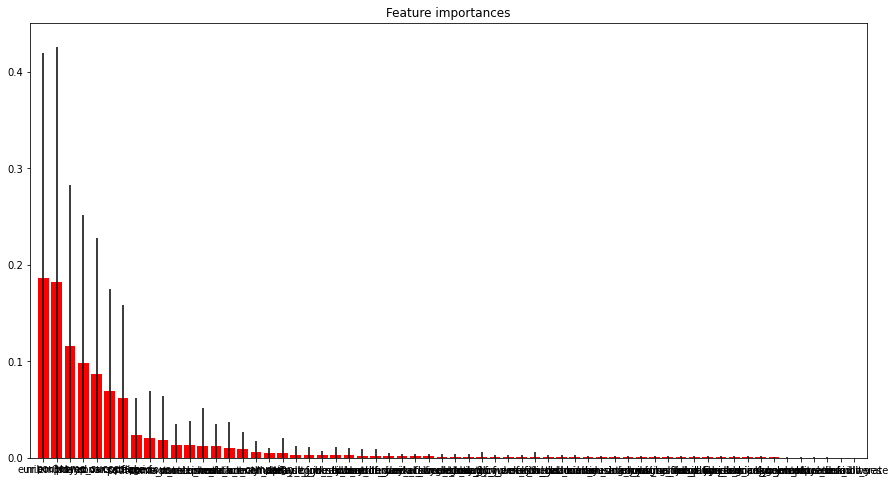

In [78]:
rf1, fig1 = random_forester(400, 6, df_fixed)

fig1.show()


ACCURACY SCORES:
[0.26785714 0.24444444 0.26303855 0.28318584 0.27252747 0.26754386
 0.25396825 0.27391304 0.23636364 0.29515419]
Mean: 0.2657996427771159

---
FEATURE_IMPORTANCES:
Feature ranking:
1. euribor3m (0.194724)
2. pdays (0.159728)
3. nr.employed (0.147180)
4. poutcome_success (0.107621)
5. emp.var.rate (0.085056)
6. cons.price.idx (0.071388)
7. cons.conf.idx (0.059958)
8. previous (0.032466)
9. age (0.028119)
10. month_oct (0.014478)
11. month_mar (0.014357)
12. contact_cellular (0.013681)
13. poutcome_nonexistent (0.012568)
14. contact_telephone (0.010806)
15. month_sep (0.009474)
16. month_may (0.008986)
17. poutcome_failure (0.005339)
18. job_student (0.004411)
19. month_apr (0.003623)
20. default_no (0.003505)
21. default_unknown (0.002544)
22. campaign (0.001907)
23. marital_single (0.001152)
24. month_aug (0.000972)
25. day_of_week_mon (0.000858)
26. job_retired (0.000794)
27. month_dec (0.000592)
28. job_blue-collar (0.000520)
29. education_basic.9y (0.000441)
30. day

C:\Users\rl18730\AppData\Local\Temp/ipykernel_14312/554208358.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


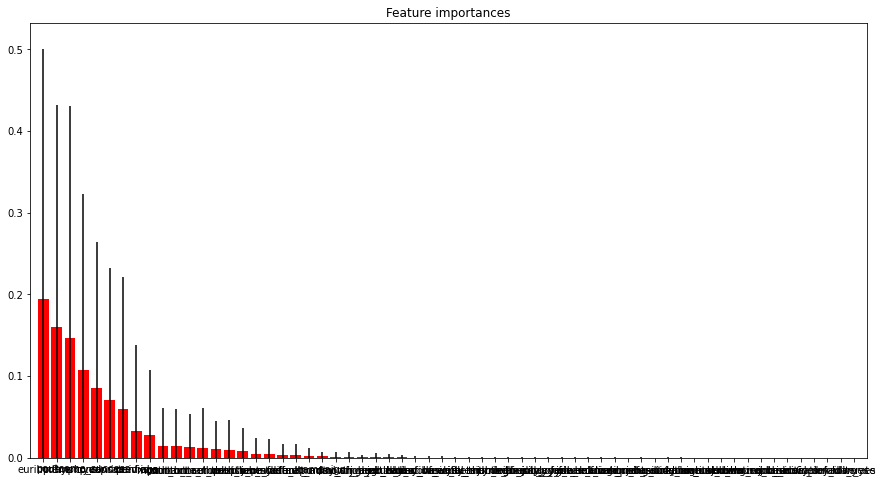

In [79]:
rf2, fig2 = random_forester(100, 3, df_fixed)

fig2.show()

ACCURACY SCORES:
[0.28256071 0.26030369 0.28381375 0.31034483 0.28817204 0.29122056
 0.27111111 0.30379747 0.26607539 0.31168831]
Mean: 0.2869087847788324

---
FEATURE_IMPORTANCES:
Feature ranking:
1. nr.employed (0.170449)
2. euribor3m (0.161217)
3. pdays (0.113570)
4. poutcome_success (0.096070)
5. emp.var.rate (0.091759)
6. cons.conf.idx (0.074256)
7. cons.price.idx (0.061647)
8. previous (0.027020)
9. poutcome_nonexistent (0.023896)
10. age (0.023339)
11. poutcome_failure (0.019665)
12. month_mar (0.017816)
13. month_oct (0.013429)
14. month_may (0.012510)
15. contact_cellular (0.012439)
16. contact_telephone (0.010738)
17. month_apr (0.006630)
18. month_sep (0.006502)
19. campaign (0.005068)
20. month_jun (0.003770)
21. day_of_week_mon (0.003424)
22. default_unknown (0.003331)
23. job_student (0.002982)
24. job_retired (0.002781)
25. default_no (0.002671)
26. job_blue-collar (0.002471)
27. month_aug (0.001895)
28. education_university.degree (0.001566)
29. marital_single (0.001555

C:\Users\rl18730\AppData\Local\Temp/ipykernel_14312/3142282922.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


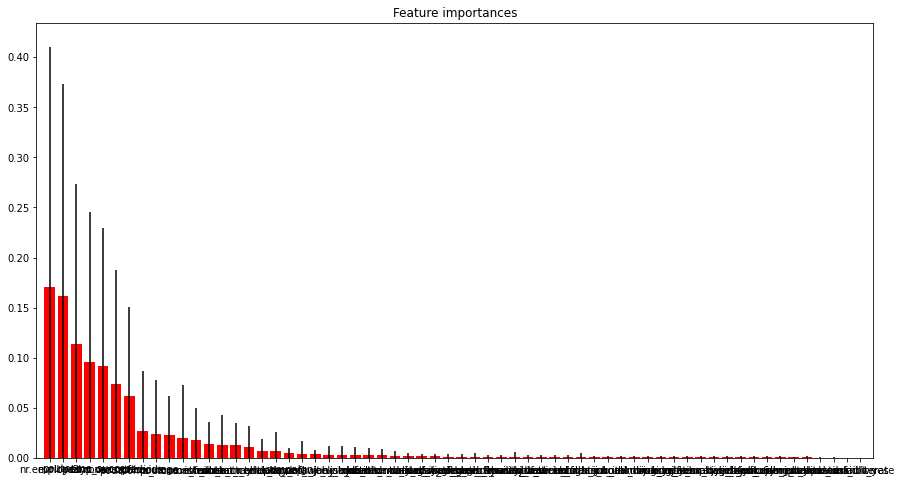

In [80]:
rf3, fig3 = random_forester(400, 6, df_fixed, rand_state=60)

fig3.show()

ACCURACY SCORES:
[0.3495935  0.2952183  0.33333333 0.32786885 0.32677165 0.344
 0.34567901 0.35108481 0.32016632 0.34086242]
Mean: 0.33345781986221307

---
FEATURE_IMPORTANCES:
Feature ranking:
1. euribor3m (0.169269)
2. nr.employed (0.130547)
3. poutcome_success (0.082475)
4. pdays (0.075670)
5. emp.var.rate (0.072939)
6. cons.conf.idx (0.060606)
7. cons.price.idx (0.049630)
8. age (0.045753)
9. previous (0.032844)
10. campaign (0.018278)
11. contact_cellular (0.015358)
12. poutcome_failure (0.015130)
13. poutcome_nonexistent (0.014421)
14. month_mar (0.014275)
15. month_may (0.012716)
16. contact_telephone (0.012463)
17. month_oct (0.012078)
18. day_of_week_mon (0.008068)
19. month_jun (0.007426)
20. month_apr (0.007186)
21. marital_single (0.005783)
22. education_university.degree (0.005745)
23. job_blue-collar (0.005342)
24. housing_yes (0.005176)
25. job_retired (0.005033)
26. housing_no (0.004962)
27. marital_married (0.004937)
28. day_of_week_thu (0.004873)
29. default_no (0.004

C:\Users\rl18730\AppData\Local\Temp/ipykernel_14312/1991399974.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


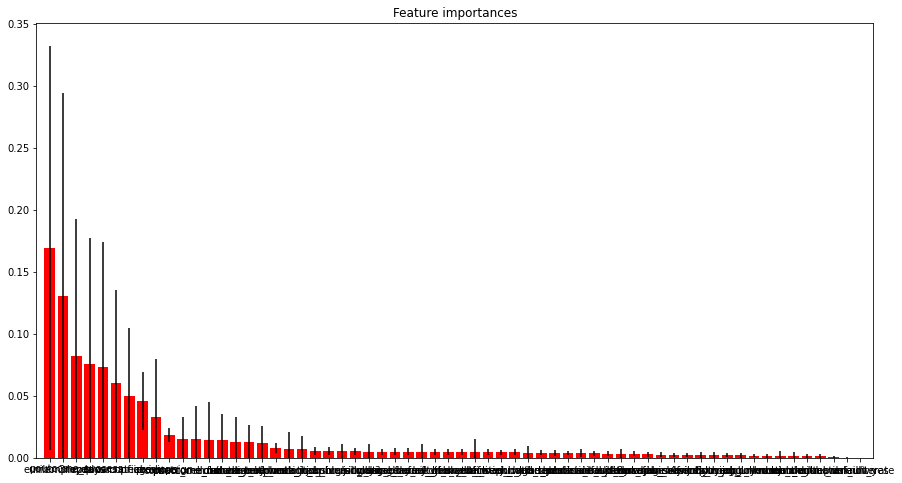

In [81]:
rf4, fig4 = random_forester(100, 10, df_fixed, rand_state=60)

fig4.show()


In [82]:
t2 = x_test.copy()

t2['y'] = y_test

t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8238 entries, 6859 to 9368
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            8238 non-null   int64  
 1   campaign                       8238 non-null   int64  
 2   pdays                          8238 non-null   int64  
 3   previous                       8238 non-null   int64  
 4   emp.var.rate                   8238 non-null   float64
 5   cons.price.idx                 8238 non-null   float64
 6   cons.conf.idx                  8238 non-null   float64
 7   euribor3m                      8238 non-null   float64
 8   nr.employed                    8238 non-null   float64
 9   job_admin.                     8238 non-null   uint8  
 10  job_blue-collar                8238 non-null   uint8  
 11  job_entrepreneur               8238 non-null   uint8  
 12  job_housemaid                  8238 non-null 

In [83]:
t2.columns



Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [84]:
t2.to_csv("testset.csv", index=False)


# ATTEMPTING TO GET A BETTER CLASSIFICATION SCORE ON THE MODEL

In [85]:

from sklearn.base import ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import QuantileTransformer, Binarizer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import balanced_accuracy_score, make_scorer, accuracy_score, precision_score, recall_score, average_precision_score, precision_recall_curve
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression

import dataclasses

from typing import TypeVar, Any

set_config(display="diagram")

C = TypeVar('C', bound=ClassifierMixin)

In [101]:
@dataclasses.dataclass(init=True, frozen=True, eq=True)
class HGridSearchResult:
    hgs: HalvingGridSearchCV
    est: BaseEstimator
    test_data_score: float

    def __lt__(self, other: "HGridSearchResult"):
        return self.test_data_score < other.test_data_score


In [121]:

def h_grid_searcher(
    classifier: C,
    param_grid: dict[str, list[Any]],
    train_df: pd.DataFrame,
    strat_k_fold: StratifiedKFold = StratifiedKFold(n_splits=8, shuffle=True)
) -> HalvingGridSearchCV:
    """
    This attempts to perform a single Halving-Grid Search Cross Validation,
    using classifier C, with the given parameter grid, and also using  the specified
    training data and training labels, with a specific StratifiedKFold instance.

    :param classifier: the type of classifier we're using
    :param param_grid: the parameter_grid being used
    :param train_data: the training data being used
    :param train_labels: the labels for the aforementioned training data
    :param strat_k_fold: the stratified K-Fold instance being used
    :return: a fitted HalvingGridSearchCV, based on specificity/precision score,
     given these arguments
    """

    pl: Pipeline = Pipeline([
        #("scaler", QuantileTransformer(output_distribution="normal")),
        #("imputer", KNNImputer(weights="distance")),
        ("classifier", classifier)
    ])

    h_grid_search: HalvingGridSearchCV = HalvingGridSearchCV(
        estimator=pl,
        param_grid=param_grid,
        factor=4,
        cv=strat_k_fold,
        # We're doing scoring based on f1 score
        scoring=make_scorer(f1_score),
        refit=True,
        aggressive_elimination=True,
        verbose=1,
        n_jobs=-1,
        error_score=0 # if there's an oopsie, we give this a score of 0.
    )

    h_grid_search.fit(train_df.drop(labels=['y'], axis=1, inplace=False), train_df['y'])

    return h_grid_search


In [122]:

def nested_h_grid_searcher(
    classifier: C,
    param_grid: dict[str, list[Any]],
    train_df: pd.DataFrame,
    test_df: pd.DataFrame,
    kfold_splits: int = 4
) -> HGridSearchResult:
    """
    Attempts to perform a HalvingGridSearchCV, with nested cross-validation
    :param classifier: the type of classifier we're attempting to use
    :param param_grid: the param_grid we're attempting to use for the classifierMixin
    :param train_data: ndarray of training data with the labels removed
    :param train_labels: ndarray of the labels of the training data
    :param t_df: A dataframe holding all of the training data
    :param kfold_splits: how many kfold splits are being used
    :return: a dictionary of HalvingGridSearchCV -> (HGridSearchResult)
    """


    skf: StratifiedKFold = StratifiedKFold(n_splits=kfold_splits, shuffle=False)


    current_search: HalvingGridSearchCV = h_grid_searcher(
        classifier,
        param_grid,
        train_df,
        StratifiedKFold(n_splits=kfold_splits, shuffle=False)
    )

    test_x = test_df.drop(labels=['y'], axis=1, inplace=False)
    test_y = test_df["y"]

    test_pred = current_search.best_estimator_.predict(test_x)

    test_score = f1_score(test_pred, test_y)

    this_res: HGridSearchResult = HGridSearchResult(current_search, current_search.best_estimator_, test_score)

    print(this_res)

    return this_res


attempting logistic regression

In [123]:
lrg_params_dict: dict[str, list[Any]] = {
    "classifier__penalty": ["l1", "elasticnet", "l2", "none"],
    "classifier__class_weight": ["balanced",None],
    "classifier__solver": ["sag","saga"],
    "classifier__C": [0.8, 0.9, 1, 1.1, 1.2]
}

lrg_results: HGridSearchResult = nested_h_grid_searcher(
    LogisticRegression(multi_class="ovr"),
    lrg_params_dict,
    train,
    test,
    10
)



n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 128
max_resources_: 8238
aggressive_elimination: True
factor: 4
----------
iter: 0
n_candidates: 80
n_resources: 128
Fitting 10 folds for each of 80 candidates, totalling 800 fits
----------
iter: 1
n_candidates: 20
n_resources: 512
Fitting 10 folds for each of 20 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 5
n_resources: 2048
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 2
n_resources: 8192
Fitting 10 folds for each of 2 candidates, totalling 20 fits


c:\python3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


HGridSearchResult(hgs=HalvingGridSearchCV(aggressive_elimination=True,
                    cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=0,
                    estimator=Pipeline(steps=[('classifier',
                                               LogisticRegression(multi_class='ovr'))]),
                    factor=4, n_jobs=-1,
                    param_grid={'classifier__C': [0.8, 0.9, 1, 1.1, 1.2],
                                'classifier__class_weight': ['balanced', None],
                                'classifier__penalty': ['l1', 'elasticnet',
                                                        'l2', 'none'],
                                'classifier__solver': ['sag', 'saga']},
                    refit=<function _refit_callable at 0x0000026F2F0A8B80>,
                    scoring=make_scorer(f1_score), verbose=1), est=Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.8, class_weight='balanced',
 

c:\python3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [124]:
lrg_results.est

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.8, class_weight='balanced',
                                    multi_class='ovr', penalty='none',
                                    solver='sag'))])

Trying several RandomForest classifiers


In [130]:
rf_params_dict: dict[str, list[any]] = {
    "classifier__n_estimators": [100, 200, 300, 400],
    "classifier__max_depth": [10, 20, 30, 40],
    "classifier__class_weight": ["balanced", "balanced_subsample", None],
    "classifier__max_features": ["sqrt", "log2"],
    "classifier__bootstrap": [True, False],
    "classifier__criterion": ["gini","entropy"]
}

rf_results: HGridSearchResult = nested_h_grid_searcher(
    RandomForestClassifier(),
    rf_params_dict,
    train,
    test,
    10
)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 40
max_resources_: 8238
aggressive_elimination: True
factor: 4
----------
iter: 0
n_candidates: 384
n_resources: 40
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
----------
iter: 1
n_candidates: 96
n_resources: 40
Fitting 10 folds for each of 96 candidates, totalling 960 fits
----------
iter: 2
n_candidates: 24
n_resources: 160
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 3
n_candidates: 6
n_resources: 640
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 2
n_resources: 2560
Fitting 10 folds for each of 2 candidates, totalling 20 fits
HGridSearchResult(hgs=HalvingGridSearchCV(aggressive_elimination=True,
                    cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=0,
                    estimator=Pipeline(steps=[('classifier',
                         

In [131]:

rf_results.est

Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=40,
                                        max_features='log2'))])

In [127]:
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier

rclass_params_dict = {
    "classifier__alpha": [0.5, 1.0, 1.5],
    "classifier__fit_intercept" : [True, False],
    "classifier__class_weight" : ["balanced", None],
    "classifier__solver": ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
}


rclass_results: HGridSearchResult = nested_h_grid_searcher(
    RidgeClassifier(),
    rclass_params_dict,
    train,
    test,
    10
)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 128
max_resources_: 8238
aggressive_elimination: True
factor: 4
----------
iter: 0
n_candidates: 84
n_resources: 128
Fitting 10 folds for each of 84 candidates, totalling 840 fits
----------
iter: 1
n_candidates: 21
n_resources: 512
Fitting 10 folds for each of 21 candidates, totalling 210 fits
----------
iter: 2
n_candidates: 6
n_resources: 2048
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 2
n_resources: 8192
Fitting 10 folds for each of 2 candidates, totalling 20 fits
HGridSearchResult(hgs=HalvingGridSearchCV(aggressive_elimination=True,
                    cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=0,
                    estimator=Pipeline(steps=[('classifier',
                                               RidgeClassifier())]),
                    factor=4, n_jobs=-1,
                    param_grid

In [128]:
rclass_results.est


Pipeline(steps=[('classifier',
                 RidgeClassifier(alpha=1.5, class_weight='balanced',
                                 solver='svd'))])

In [132]:


#with open("model.pkl", "wb") as file:
#    pickle.dump(rf_results.pipeline, file)

outf = open("model.pkl", "wb")

best_res = max([lrg_results, rf_results, rclass_results])

pickle.dump(best_res.est, outf, -1)

outf.close()